In [1]:
import os
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tabulate import tabulate

In [2]:
Eh_IN_eV                 = 27.211385                       # eV / Eh

In [3]:
def plotting(to_plot,x,lit_key,parameters):
    #style
    x_lim, y_lim, x_ticks, y_ticks, axis_labels = parameters[0:5]
    fig, ax = plt.subplots(1,1,figsize=parameters[6])
    plot_labels = parameters[5]
    #plots
    for i in range(len(to_plot)):
        ax.plot(x,to_plot[i],label=plot_labels[i],linestyle=parameters[7][i])
    if lit_key is True:
        arr = np.zeros((2,150))
        arr[0,:] = np.load('lit_y.npy')
        arr[1,:] = np.load('lit_x.npy')
        ysmoothed = gaussian_filter1d(arr, sigma=2,order=0, mode="constant")
        ax.plot(arr[1,:],13.4*ysmoothed[0,:],label='C$_{6}$H$_{6}$ vapor, exp',linestyle=':',linewidth=2,color='grey')
    #axis
    ax.set_ylim(y_lim)
    ax.set_xlim(x_lim)
    ax.set_xlabel(axis_labels[0],fontsize=13)
    ax.set_ylabel(axis_labels[1],fontsize=13) 
    #ticks
    ax.yaxis.set_major_locator(ticker.MultipleLocator(y_ticks))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(x_ticks))
    ax.grid(True)
    #legend
    plt.legend(loc='best', fancybox=True, framealpha=1, prop={'size': 13.5})
    plt.show()

# Plots

In [4]:
file_names = ['u_3p5_h_x_FT.npy','c_3p5_h_x_FT.npy']
x          = np.load('u_3p5_h_x_omega.npy')*Eh_IN_eV 

for i in range(len(file_names)):
    print(np.load(file_names[i].replace('FT.npy','keys.npy')))


['3.5 ' 'Hollow' 'x-field' 'Uncoupled']
['3.5 ' 'Hollow' 'x-field' 'Coupled']


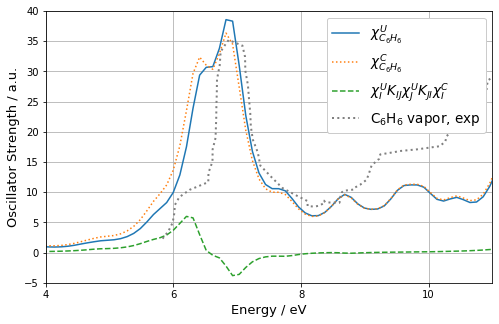

In [5]:
uncoupled  = np.imag(np.load(file_names[0]))
coupled    = np.imag(np.load(file_names[1]))
three_body = coupled - uncoupled
to_plot    = [uncoupled,coupled,three_body]
parameters = [[4,11],[-5,40], #limits
              2,5,            #ticks
              ['Energy / eV','Oscillator Strength / a.u.'],              #axis
              ['$\chi^{U}_{C_{6}H_{6}}$',
               '$\chi^{C}_{C_{6}H_{6}}$',
               '$\chi^{U}_{I} K_{IJ} \chi^{U}_{J} K_{JI} \chi^{C}_{I}$'], #labels
             (8,5), #figure size
             ['-',':','--'] #line style
             ]
literature = True
plotting(to_plot,x,literature,parameters)

# Tables

## polarizability, c6 coefficient

In [6]:
FT_files   = sorted([f for f in os.listdir(os.getcwd()) if f.endswith('FT.npy')])
n          = len(FT_files)
table_data = [[]]*n

In [7]:
for i in range(n):
    FT_file    = FT_files[i]
    LT_file    = FT_files[i].replace('FT.npy','LT.npy')
    if 'c' in LT_file:
        signal_c         = np.load(FT_file)
        signal_u         = np.load(FT_file.replace('c','u'))
        omega            = np.load(FT_file.replace('FT.npy','omega.npy'))
        domega_FT        = np.load(FT_file.replace('FT.npy','domega.npy'))
        
        polarizability_c = np.sum(np.imag(signal_c[1:])/omega[1:]**2) * domega_FT
        polarizability_u = np.sum(np.imag(signal_u[1:])/omega[1:]**2) * domega_FT
        keys             = np.load(FT_file.replace('FT.npy','keys.npy'))
        
        coupled       = np.load(LT_file)
        uncoupled     = np.load(LT_file.replace('c','u'))
        c6_uncoupled  = np.real((3.0/np.pi)*np.sum(uncoupled[1:]*uncoupled[1:])* domega_FT)
        c6_coupled    = np.real((3.0/np.pi)*np.sum(uncoupled[1:]*coupled[1:])* domega_FT)
        
        table_data[i]  = np.append(keys[0:3],polarizability_u)
        table_data[i]  = np.append(table_data[i],polarizability_c)
        table_data[i]  = np.append(table_data[i],c6_uncoupled)
        table_data[i]  = np.append(table_data[i],c6_coupled)
    if 'iso_x' in LT_file:
        signal           = np.load(FT_file)
        alpha_x          = np.load(LT_file)[1:]
        domega_x         = np.load(LT_file.replace('LT.npy','domega.npy'))
        polarizability_x = np.sum(np.imag(signal[1:])/omega[1:]**2) * domega_x
    if 'iso_y' in LT_file:
        signal           = np.load(FT_file)
        alpha_y          = np.load(LT_file)[1:]
        domega_y         = np.load(LT_file.replace('LT.npy','domega.npy'))
        polarizability_y = np.sum(np.imag(signal[1:])/omega[1:]**2) * domega_y
    if 'iso_z' in LT_file:
        signal           = np.load(FT_file)
        alpha_z          = np.load(LT_file)[1:]
        domega_z         = np.load(LT_file.replace('LT.npy','domega.npy'))
        polarizability_z = np.sum(np.imag(signal[1:])/omega[1:]**2) * domega_z

alpha              = (alpha_x + alpha_y + alpha_z)/3 
domega_LT          = (domega_x + domega_y + domega_z)/3
c6_isolated        = np.real((3.0/np.pi)*np.sum(alpha*alpha)* domega_LT)
c6_isolated_x      = np.real((3.0/np.pi)*np.sum(alpha_x*alpha_x)* domega_x)
polarizability_iso = (polarizability_x+polarizability_y+polarizability_z)/3

In [8]:
headers        = ['distance, \u212B', 'site',' ','polariz_uncpl, a.u.','polariz_cpl, a.u.','c6_uncpl, a.u.','c6_cpl, a.u.']
table_data[11] = ['','Isolated','x-field',polarizability_x,None,c6_isolated_x,None]
table_data[13] = ['','Isolated','averaged',polarizability_iso,None,c6_isolated,None]

full_table     = tabulate(table_data[0:14],headers=headers,numalign="decimal",floatfmt=".3f",tablefmt="rst")
print(full_table)

=============  ========  ========  =====================  ===================  ================  ==============
distance, Å    site                  polariz_uncpl, a.u.    polariz_cpl, a.u.    c6_uncpl, a.u.    c6_cpl, a.u.
=============  ========  ========  =====================  ===================  ================  ==============
3.5            Hollow    x-field                  96.058               99.018          2765.365        2809.006
3.5            Bridge    x-field                  95.671               98.624          2762.732        2805.904
3.5            Top       x-field                  95.936               98.788          2764.461        2807.484
3.75           Hollow    x-field                  95.395               97.374          2756.288        2785.891
4.0            Hollow    x-field                  95.260               96.546          2751.478        2771.478
4.0            Bridge    x-field                  95.017               96.339          2749.747        2

## Functions for excitation energy, broadening, oscillator strength

In [9]:
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [10]:
def damp_funct(t0, daping_factor):
    return np.exp(-(t0) * 2.0 * np.pi * daping_factor/Eh_IN_eV )

def fft_funct(t0, f0):
    return np.exp( - 1j*t0 * 2.0 * np.pi * f0 )

def locat_fft(dipole_data,e_direction,dt_au,damping_factor,omega_range):
    e_dir   = e_direction - 1
    my_len  = len(dipole_data[:,e_dir])
    min_w   = omega_range[0]
    max_w   = omega_range[1]
    x       = np.linspace(0,my_len,my_len,endpoint=False)
    omega   = np.linspace(min_w,max_w,my_len,endpoint=False) / 27.211385 
    d_omega = (omega[2] - omega[1])
    dip_    = np.array(dipole_data, dtype=np.float)
    dip     = dip_[:,e_dir] - dip_[0,e_dir]
    d       = dt_au / (2*np.pi)
    t       = x * d    
    damp    = damp_funct(t, damping_factor)
    signal  = dip * damp
    dip_FFT = np.zeros(my_len) + 1j * np.zeros(my_len)
    for i in range(0,my_len):
        dip_FFT[i] = np.sum(signal[:]*fft_funct(t[:],omega[i]))*dt_au
    return dip_FFT, omega, d_omega

def first_peak(dipole_data_m,e_direction_m,e_strength,dt_au_m,damping_factor,omega_range):
    dip_FFT_m, omega_m, d_omega_m = locat_fft(dipole_data_m,e_direction_m,dt_au_m,damping_factor,omega_range)
    sigma_m                       = dip_FFT_m * 2. / e_strength / np.pi
    S_m                           = sigma_m * omega_m
    return S_m, omega_m, d_omega_m

def lorentz(x,*p):
    a, b, c = p
    y       = a*c/(np.pi*(np.power((x-b), 2.0) + c**2))
    return y

def get_params(x,u,c,p1,p2,bound):
    i1     = np.amin(np.where(x >= bound[0]))
    j1     = np.amax(np.where(x <= bound[1]))
    x_peak = x[i1:j1]
    u_peak = u[i1:j1]
    c_peak = c[i1:j1]
    popt1, pcov1 = curve_fit(lorentz, x_peak, u_peak, p1)
    popt2, pcov2 = curve_fit(lorentz, x_peak, c_peak, p2)
    err_u = np.sqrt(np.diag(pcov1))
    err_c = np.sqrt(np.diag(pcov2))
    return popt1, popt2, x_peak, u_peak, c_peak, err_u, err_c

def get_os(up,cp):
    I1 = quad(lorentz,-np.inf,np.inf, args=(tuple(up)))
    I2 = quad(lorentz,-np.inf,np.inf, args=(tuple(cp)))
    return I1[0], I2[0]

def make_a_table(a,b,keys):
    data = [keys[0],keys[1], 
            a[0][1],a[5][1],None ,None,a[1][1],a[6][1],None ,None, 
            a[1][2]-a[0][2], max(a[5][2],a[6][2]),None ,None, 
            get_os(a[0],a[1])[0],get_os(a[0],a[1])[1],None,None]
    if b == None:
        return data
    data[4], data[5] = b[0][1],b[5][1]
    data[8], data[9] = b[1][1],b[6][1]
    data[12], data[13] = b[1][2]-b[0][2], max(b[5][2],b[6][2])
    data[16] = get_os(b[0],b[1])[0]
    data[17] = get_os(b[0],b[1])[1]       
    return data

## Computing excitation energy, broadening, oscillator strength

In [11]:
damping_factor = 0.27
omega_range    = [4,11] # where to look for the peak
dt             = 0.08268
e_direction    = 1
e_strength     = 0.00106
Dipole_files   = sorted([f for f in os.listdir(os.getcwd()) if f.endswith('dipole.npy')])
table_data2    = []

In [12]:
for i in range(len(Dipole_files)):
    dipole_file = Dipole_files[i]
    p1 = [0, 6.7,  0.4] 
    p2 = [0, 6.7,  0.4]
    if 'c' in dipole_file:
        if '3p5' in dipole_file:
            shoulder_key    = True
            peak_bound      = [6.85,7.0]
            shoulder_bound  = [6.2,6.4]
            shoulder_delta  = 0.5
        if '3p75'in dipole_file:
            shoulder_key    = True
            peak_bound      = [6.85,7.0]
            shoulder_bound  = [6.2,6.5]
            shoulder_delta  = 0.5
        if '4p0' in dipole_file:
            shoulder_key    = False
            peak_bound      = [6.55,6.75]
        if '4p25' in dipole_file or '4p5' in dipole_file:
            shoulder_key    = False
            peak_bound      = [6.6,6.9]
        keys                = np.load(dipole_file.replace('dipole.npy','keys.npy')) 
        dipole_data_c       = np.load(dipole_file)
        dipole_data_u       = np.load(dipole_file.replace('c','u'))
        print(keys, 'is being analyzed')
        Sm_c, omega, domega = first_peak(dipole_data_c,e_direction,e_strength,dt,damping_factor,omega_range)
        Sm_u, omega, domega = first_peak(dipole_data_u,e_direction,e_strength,dt,damping_factor,omega_range)
      #to see the first peak fit: execute fit() and plot() at the bottom of the notebook,
      #and uncomment the next code line.
#         plot(fit(omega*Eh_IN_eV,np.imag(Sm_u),
#                  np.imag(Sm_c),peak_bound,p1,p2,shoulder_delta,shoulder_bound,shoulder_key),shoulder_key)
        a = get_params(omega*Eh_IN_eV,np.imag(Sm_u),np.imag(Sm_c),p1,p2,peak_bound)
        b = None
        if shoulder_key is True:
            p1    = a[0]
            p1[1] = a[0][1] - shoulder_delta
            p2    = a[1]
            p2[1] = a[1][1] - shoulder_delta
            b     = get_params(omega*Eh_IN_eV,np.imag(Sm_u),np.imag(Sm_c),p1,p2,shoulder_bound)
        table_data2.append(make_a_table(a,b,keys))   

['3.5 ' 'Hollow' 'x-field' 'Coupled'] is being analyzed
['3.5 ' 'Bridge' 'x-field' 'Coupled'] is being analyzed
['3.5 ' 'Top' 'x-field' 'Coupled'] is being analyzed
['3.75' 'Hollow' 'x-field' 'Coupled'] is being analyzed
['4.0 ' 'Hollow' 'x-field' 'Coupled'] is being analyzed
['4.0 ' 'Bridge' 'x-field' 'Coupled'] is being analyzed
['4.0 ' 'Top' 'x-field' 'Coupled'] is being analyzed
['4.25' 'Hollow' 'x-field' 'Coupled'] is being analyzed
['4.5 ' 'Hollow' 'x-field' 'Coupled'] is being analyzed
['4.5 ' 'Bridge' 'x-field' 'Coupled'] is being analyzed
['4.5 ' 'Top' 'x-field' 'Coupled'] is being analyzed


In [13]:
key_inf      =[item[0:2] for item in table_data2]
excitations  =[item[2:10] for item in table_data2]
excitationsN =[l1+l2 for l1,l2 in zip(key_inf,excitations)]
broadenings  =[item[10:14] for item in table_data2]
broadeningsN =[l1+l2 for l1,l2 in zip(key_inf,broadenings)]
oscillators  =[item[14:18] for item in table_data2] 
oscillatorsN =[l1+l2 for l1,l2 in zip(key_inf,oscillators)]

### Excitation energy

In [14]:
excitations_labes = ['distance, \u212B', 'site','U,peak, eV','err','U,shldr , eV','err',
                    'C,peak, eV','err','C,shldr , eV','err']
print(tabulate(excitationsN,headers=excitations_labes,numalign="decimal",floatfmt=".4f",tablefmt="rst"))

=============  ======  ============  ======  ==============  ======  ============  ======  ==============  ======
  distance, Å  site      U,peak, eV     err    U,shldr , eV     err    C,peak, eV     err    C,shldr , eV     err
=============  ======  ============  ======  ==============  ======  ============  ======  ==============  ======
       3.5000  Hollow        6.3747  0.0000          6.4643  0.0001        6.3523  0.0000          6.4054  0.0000
       3.5000  Bridge        6.3895  0.0000          6.4401  0.0001        6.3483  0.0000          6.3994  0.0001
       3.5000  Top           6.3977  0.0000          6.4259  0.0001        6.3779  0.0000          6.3731  0.0001
       3.7500  Hollow        6.3734  0.0001          6.5301  0.0000        6.3628  0.0001          6.4864  0.0001
       4.0000  Hollow        6.6488  0.0001                                6.6106  0.0001
       4.0000  Bridge        6.6429  0.0001                                6.6052  0.0001
       4.0000  Top    

### Broadening

In [15]:
broadenings_labes = ['distance, \u212B', 'site','peak, eV','err','shoulder , eV','err']

print(tabulate(broadeningsN,headers=broadenings_labes,numalign="decimal",floatfmt=".4f",tablefmt="rst"))

=============  ======  ==========  ======  ===============  ======
  distance, Å  site      peak, eV     err    shoulder , eV     err
=============  ======  ==========  ======  ===============  ======
       3.5000  Hollow      0.0096  0.0001           0.0255  0.0001
       3.5000  Bridge      0.0638  0.0001           0.0533  0.0003
       3.5000  Top         0.0046  0.0002           0.0219  0.0001
       3.7500  Hollow      0.0035  0.0003           0.0227  0.0001
       4.0000  Hollow      0.0336  0.0005
       4.0000  Bridge      0.0323  0.0005
       4.0000  Top         0.0317  0.0005
       4.2500  Hollow      0.0149  0.0000
       4.5000  Hollow      0.0103  0.0002
       4.5000  Bridge      0.0099  0.0002
       4.5000  Top         0.0098  0.0002
=============  ======  ==========  ======  ===============  ======


### Oscillator strength

In [16]:
oscillators_labes = ['distance, \u212B', 'site','U,peak, a.u.','C,peak, a.u.','U,shldr, a.u.','C,shldr, a.u.']

print(tabulate(oscillatorsN,headers=oscillators_labes,numalign="decimal",floatfmt=".4f",tablefmt="rst"))

=============  ======  ==============  ==============  ===============  ===============
  distance, Å  site      U,peak, a.u.    C,peak, a.u.    U,shldr, a.u.    C,shldr, a.u.
=============  ======  ==============  ==============  ===============  ===============
       3.5000  Hollow         36.9719         35.3129          29.0039          33.4889
       3.5000  Bridge         36.0335         40.7745          28.1698          35.6097
       3.5000  Top            35.4356         34.0486          27.8255          32.1270
       3.7500  Hollow         38.3100         36.4689          33.0244          36.4489
       4.0000  Hollow         44.7883         48.7740
       4.0000  Bridge         44.6246         48.5842
       4.0000  Top            44.5469         48.4984
       4.2500  Hollow         46.9721         48.2027
       4.5000  Hollow         47.8683         48.5932
       4.5000  Bridge         47.8226         48.5538
       4.5000  Top            47.8091         48.5443
======

#### execute if plot(fit()) is uncommented

In [17]:
def fit(x,u,c,peak_bound,p1,p2,shoulder_delta,shoulder_bound,shouder_key):
    popt1, popt2, x_peak, u_peak, c_peak  = get_params(x,u,c,p1,p2,peak_bound)[0:5]
    x_linspaced                           = np.linspace(x[0],x[-1],len(u))
    u_fitted                              = lorentz(x_linspaced, *popt1)
    c_fitted                              = lorentz(x_linspaced, *popt2)
    if shouder_key is True:
        p1    = popt1
        p1[1] = popt1[1] - shoulder_delta
        p2    = popt2
        p2[1] = popt2[1] - shoulder_delta
        popt1_sh, popt2_sh, x_sh, u_sh, c_sh  = get_params(x,u,c,p1,p2,shoulder_bound)[0:5]
        u_sh_fitted                           = lorentz(x_linspaced, *popt1_sh)
        c_sh_fitted                           = lorentz(x_linspaced, *popt2_sh)
        return x,u,c,x_peak,u_peak,c_peak,x_linspaced,u_fitted,c_fitted,x_sh,u_sh,c_sh,u_sh_fitted,c_sh_fitted
    return x,u,c,x_peak,u_peak,c_peak,x_linspaced,u_fitted,c_fitted

def plot(f,shouder_key):
    fig, ax = plt.subplots(1,1,figsize=(16,10))
    if shouder_key is True:
        x_org,u_org,c_org,x_peak,u_peak,c_peak, \
        x_linspaced,u_fitted,c_fitted,x_sh,u_sh,c_sh,u_sh_fitted,c_sh_fitted = f
        ax.plot(x_linspaced,u_sh_fitted,label='fitted uncoupled shoulder',linestyle='--',linewidth=2,color='lightseagreen')
        ax.plot(x_linspaced,c_sh_fitted,label='fitted coupled shoulder',linestyle='--',linewidth=2,color='tomato')
        ax.plot(x_sh,u_sh,label='points used for uncoupled shoulder',linestyle='-',linewidth=3,color='lightseagreen')
        ax.plot(x_sh,c_sh,label='points used for coupled shoulder',linestyle='-',linewidth=3,color='tomato')
    else:
        x_org,u_org,c_org,x_peak,u_peak,c_peak,x_linspaced,u_fitted,c_fitted = f 
    ax.plot(x_org,u_org,label='full uncoupled peak',linestyle=':',linewidth=3,color='lightblue')
    ax.plot(x_org,c_org,label='full coupled peak',linestyle=':',linewidth=3,color='peachpuff')
    ax.plot(x_linspaced,u_fitted,label='fitted uncoupled peak',linestyle=':',linewidth=2,color='royalblue')
    ax.plot(x_linspaced,c_fitted,label='fitted coupled peak',linestyle=':',linewidth=2,color='darkorange')
    ax.plot(x_peak,u_peak,label='points used for uncoupled peak',linestyle='-',linewidth=3,color='royalblue')
    ax.plot(x_peak,c_peak,label='points used for coupled peak',linestyle='-',linewidth=3,color='darkorange')
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.set_xlim([4,11])
    leg = plt.legend(loc=1, fancybox=True, framealpha=1, prop={'size': 15})
    ax.set_xlabel("Energy / eV",fontsize=13)
    ax.set_ylabel("Oscillator Strength / a.u.",fontsize=13)

    plt.show()